### Reading the data

The data comes from 2020 Developer Survey conducted by Stack Overflow. You can find it in the [data directory](data/). You can also download this and previous survey results from [here](https://insights.stackoverflow.com/survey).

In [1]:
import pandas as pd

survey_data_file_path = "data/survey_results_public.csv"
survey_df = pd.read_csv(survey_data_file_path, index_col="Respondent")
survey_df.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


### Data cleaning
#### 1. Professionals only
I'm interested in professionals only. `MainBranch` column seems to contain such information. Let's find out what are possible values in this column.

In [2]:
unique_branches = survey_df["MainBranch"].unique()
print("\n".join(f"- {branch}" for branch in unique_branches))

- I am a developer by profession
- I code primarily as a hobby
- I used to be a developer by profession, but no longer am
- I am not primarily a developer, but I write code sometimes as part of my work
- I am a student who is learning to code
- nan


It seems that I should take into account only respondents that answered: *I am a developer by profession*.

In [3]:
is_professional_dev = survey_df["MainBranch"] == "I am a developer by profession"
survey_df = survey_df[is_professional_dev]
survey_df.head()

,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
Respondent,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
6,I am a developer by profession,No,NaN,14,NaN,NaN,NaN,Germany,European Euro,EUR,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,React.js,NaN,NaN,NaN,6,4
7,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,United States dollar,USD,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,A lot more welcome now than last year,NaN,6,4


#### 2. Do you use agile?
Unfortunately, there is such question. I picked the `NEWCollabToolsWorkedWith` column instead. I **assumed** that if the answer is “Jira” there is a high chance that the respondent is working in an Agile environment.

In [4]:
survey_df["NEWCollabToolsWorkedWith"].head().to_frame()  # .to_frame() is used for nicer output in the notebook

,NEWCollabToolsWorkedWith
Respondent,
1,Confluence;Jira;Slack;Microsoft Azure;Trello
2,Confluence;Jira;Github;Gitlab;Slack
4,NaN
6,Confluence;Github;Slack;Trello
7,NaN


In [5]:
survey_df["UseJira"] = survey_df["NEWCollabToolsWorkedWith"].str.contains("Jira").astype(bool)

#### 3. What type of developer are you?

Answering this question is easy. `DevType` column meet my expectations, given the fact that one of the possible answers was “Data scientist or machine learning specialist”. See the “Which of the following describe you?” question [in the survey](data/so_survey_2020.pdf) and [results schema](data/survey_results_schema.csv).

In [6]:
survey_df["DevType"].head().to_frame()

,DevType
Respondent,
1,"Developer, desktop or enterprise applications;..."
2,"Developer, full-stack;Developer, mobile"
4,NaN
6,"Designer;Developer, front-end;Developer, mobile"
7,"Developer, back-end;Developer, front-end;Devel..."


There is a tiny bit of cleanup needed, before using `DevType` column. There are multiple answers per row separated by a semicolon. It will be easier to group results later on if we explode such answers to many rows. Luckily we do have a util function to do the trick.

In [7]:
from utils import explode_str_column

survey_df = explode_str_column(survey_df, "DevType")
survey_df["DevType"].head().to_frame()

,DevType
Respondent,
1,"Developer, desktop or enterprise applications"
1,"Developer, full-stack"
2,"Developer, full-stack"
2,"Developer, mobile"
4,NaN


### Results and plot

Data cleanup that we just did makes it easy to group respondents by `DevType` and count how many of them `UseJira`.

In [8]:
agile_by_role = survey_df.groupby("DevType")[["UseJira"]].mean().sort_values("UseJira")
agile_by_role *= 100
agile_by_role = agile_by_role.rename(columns={"UseJira": "Use Agile"})
agile_by_role.index.rename("Role", inplace=True)
agile_by_role

,Use Agile
Role,
Marketing or sales professional,45.994065
Academic researcher,48.201127
Scientist,48.830189
Database administrator,50.010686
Designer,50.732997
Senior executive/VP,51.505376
System administrator,51.946344
Product manager,54.106548
Data or business analyst,54.222908


The representation above is informative, but it would be nice to finish with a neat plot. I'm highlighting Data Scientist and related roles to make the plot more verbose.

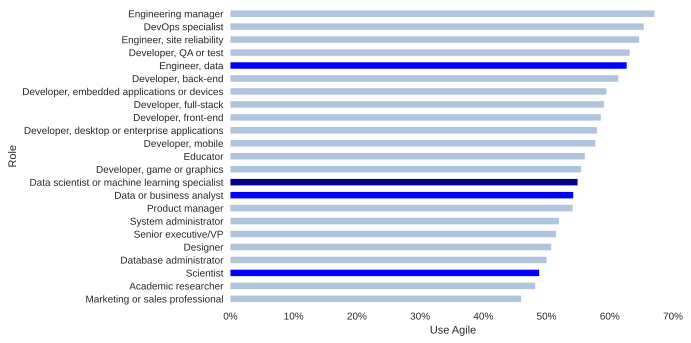

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = "svg"

import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

plt.style.use("seaborn")

def get_color(role):
    data_scientist = "Data scientist or machine learning specialist"
    data_science_related_roles = (
        "Scientist",
        "Data or business analyst",
        "Engineer, data",
    )
    if role == data_scientist:
        return "darkblue"
    if role in data_science_related_roles:
        return "blue"
    return "lightsteelblue"

bar_colors = [get_color(role) for role in agile_by_role.index]
ax = agile_by_role["Use Agile"].plot(kind="barh",  color=bar_colors)
plt.xlabel("Use Agile")
plt.grid(False)
ax.patch.set_facecolor("white")
ax.xaxis.set_major_formatter(FormatStrFormatter("%d%%"))
plt.show()